In [1]:
import pandas as pd

In [2]:
src = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'

In [31]:
# by state
df = pd.read_csv(src)
df = df[df['Country/Region'] == 'US']

df_counties = df[df['Province/State'].str.contains(',')]
df_counties = df_counties.groupby(['Country/Region'], as_index=False).sum()
df_counties = df_counties.drop(['Lat', 'Long'], axis=1)
df_counties = df_counties.T
df_counties = df_counties.drop(['Country/Region'])
df_counties = df_counties.reset_index()
df_counties = df_counties.truncate(after=47)

df = df[~df['Province/State'].str.contains(',')]
df = df[~df['Province/State'].str.contains('Princess')]
df = df.groupby(['Country/Region'], as_index=False).sum()
df = df.drop(['Lat', 'Long'], axis=1)
df = df.T
df = df.drop(['Country/Region'])

df = df.reset_index()
df = df.truncate(before=48)

df = df_counties.append(df)

df = df.set_index(['index'])
df.columns = ['US']

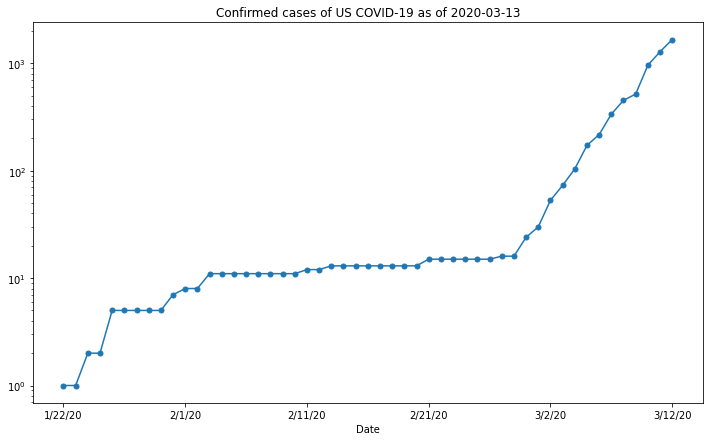

In [33]:
import matplotlib.pyplot as plt
import datetime

fig,ax = plt.subplots(figsize=(12,7))
df.plot(ax = ax, marker = '.', markersize = 10, legend = False)
plt.yscale('log')
plt.xlabel('Date')
ax.set_title('Confirmed cases of US COVID-19 as of ' + datetime.datetime.today().strftime("%Y-%m-%d"));